<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/FeatureScalingAndTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
# To display floating values to 3 decimal places
np.set_printoptions(precision=3)

In [4]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

diabetes = pd.read_csv(io.BytesIO(uploaded['diabetes_processed.csv']))

Saving diabetes_processed.csv to diabetes_processed (1).csv


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [0]:
features_df = diabetes.drop('Outcome', axis = 1)
target_df = diabetes['Outcome']

In [7]:
features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [8]:
features_df.shape

(768, 8)

In [9]:
features_df.describe()
# We can see that different features in out data has a very different range of values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.994792,152.815064,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096346,8.886506,97.206638,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-16.568152,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,89.976015,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,32.000000,131.100779,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,189.857469,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [0]:
# First Technique to Scale using MINMAXSCALER
# MINMAXSCALER is very sensitive to outliers in your Data
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_features = scaler.fit_transform(features_df)

In [13]:
rescaled_features.shape

(768, 8)

In [14]:
# rescaled_features are in the form of numpy array
rescaled_features[0:5]

# Now all are value ranges between 0 and 1

array([[0.35294118, 0.67096774, 0.48979592, 0.30434783, 0.27313386,
        0.31492843, 0.23441503, 0.48333333],
       [0.05882353, 0.26451613, 0.42857143, 0.23913043, 0.10075691,
        0.17177914, 0.11656704, 0.16666667],
       [0.47058824, 0.89677419, 0.40816327, 0.27173913, 0.33289117,
        0.10429448, 0.25362938, 0.18333333],
       [0.05882353, 0.29032258, 0.42857143, 0.17391304, 0.12818483,
        0.20245399, 0.03800171, 0.        ],
       [0.        , 0.6       , 0.16326531, 0.30434783, 0.21397515,
        0.50920245, 0.94363792, 0.2       ]])

In [16]:
# Instantiate rescaled features in form of DataFrame 
rescaled_features_df = pd.DataFrame(rescaled_features, columns = features_df.columns)
rescaled_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.273134,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.100757,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.271739,0.332891,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.128185,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.213975,0.509202,0.943638,0.200000


In [17]:
rescaled_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493930,0.249943,0.196371,0.291430,0.168179,0.204015
std,0.198210,0.196376,0.123432,0.096592,0.112694,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.123520,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.271739,0.171197,0.282209,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239315,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


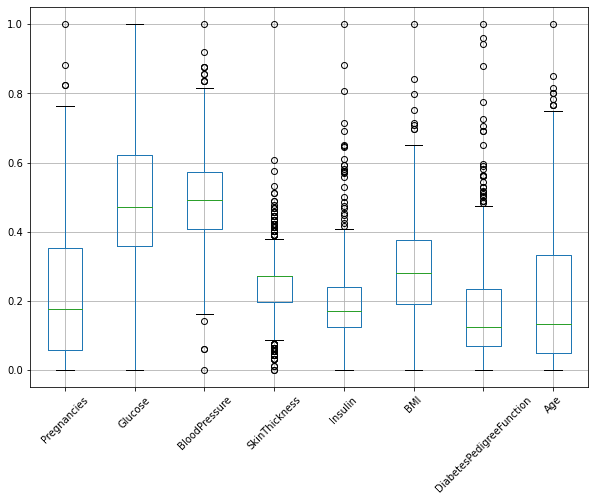

In [18]:
# Visualizing rescaled features in form of box plot
rescaled_features_df.boxplot(figsize = (10,7), rot = 45)
plt.show()
# Box plot also shows that min and max are 0 and 1

# MINMAXSCALER is very sensitive to outliers in your Data
# Another Transformation technique is - Standardization

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# Standardization is performed feature wise. 
scaler = StandardScaler()
scaler = scaler.fit(features_df)
standardize_features = scaler.transform(features_df)

In [22]:
standardize_features[0:5]

array([[ 0.63994726,  0.86604475, -0.03351824,  0.56360399,  0.68160469,
         0.16724016,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.52985903, -0.11201703, -0.8489879 ,
        -0.85155088, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69530596,  0.22579348,  1.21220989,
        -1.33183808,  0.60439732, -0.10558415],
       [-0.84488505, -1.07356674, -0.52985903, -0.78763804, -0.60544623,
        -0.63323851, -0.92076261, -1.04154944],
       [-1.14185152,  0.50442227, -2.68066914,  0.56360399,  0.15631476,
         1.54988514,  5.4849091 , -0.0204964 ]])

In [23]:
standardize_features_df = pd.DataFrame(standardize_features,columns = features_df.columns)
standardize_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.033518,0.563604,0.681605,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-0.112017,-0.848988,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,0.225793,1.212210,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-0.787638,-0.605446,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,0.563604,0.156315,1.549885,5.484909,-0.020496


In [24]:
standardize_features_df.describe()
# We can see that mean is almost 0 and standard deviation of 1.
# Most commonly used technique

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,7.661695e-18,-4.474864e-16,3.850725e-17,-2.177078e-16,4.803738e-16,2.491497e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.004245e+00,-2.589294e+00,-1.743642e+00,-2.074100e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.953060e-01,-5.624310e-01,-6.468694e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-1.675912e-02,2.257935e-01,-2.235283e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.282695e-01,2.257935e-01,3.813170e-01,6.038649e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.102655e+00,7.770228e+00,7.135692e+00,5.042883e+00,5.883565e+00,4.063716e+00


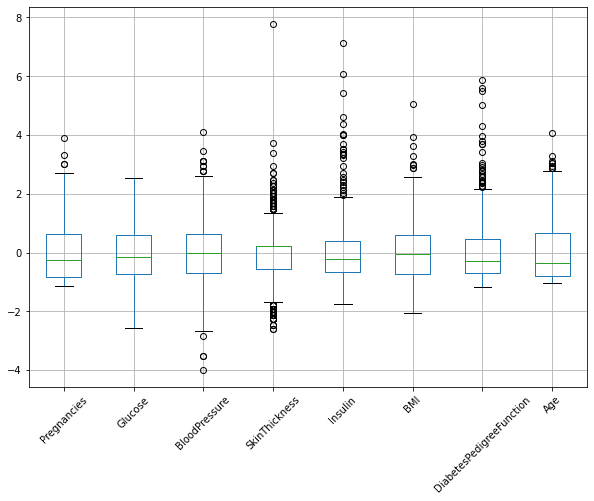

In [25]:
standardize_features_df.boxplot(figsize = (10,7), rot = 45)
plt.show()

# We can see mean is almost 0 for all features

### **Normalization** - # Normalization is a technique that converts row or record to have unit magnitude where there are different kinds of magnitude.

In [0]:
from sklearn.preprocessing import Normalizer

### l1 norm

In [0]:
# Normalizing feature vectors using 'l1' norm
normalizer = Normalizer(norm = 'l1')
normalised_features = normalizer.fit_transform(features_df)

In [0]:
l1_normalised_features_df = pd.DataFrame(normalised_features, columns = features_df.columns)

In [32]:
l1_normalised_features_df.shape

(768, 8)

In [31]:
l1_normalised_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.008783,0.277573,0.172123,0.070320,0.316056,0.076590,0.001112,0.077247
std,0.007640,0.041135,0.044909,0.023075,0.102874,0.020457,0.000791,0.025737
min,0.000000,0.135758,0.049648,0.010969,-0.074916,0.024907,0.000140,0.022036
25%,0.002830,0.254690,0.143208,0.054114,0.253162,0.062672,0.000547,0.059637
50%,0.007020,0.273784,0.167992,0.068402,0.313873,0.074705,0.000884,0.073537
75%,0.012958,0.297115,0.201648,0.083885,0.378071,0.088527,0.001456,0.090728
max,0.041208,0.447460,0.340415,0.166877,0.700043,0.161056,0.005737,0.252305


In [33]:
l1_normalised_features_df.iloc[0]

Pregnancies                 0.010633
Glucose                     0.262293
BloodPressure               0.127602
SkinThickness               0.062029
Insulin                     0.388172
BMI                         0.059548
DiabetesPedigreeFunction    0.001111
Age                         0.088612
Name: 0, dtype: float64

In [34]:
l1_normalised_features_df.iloc[0].abs().sum()
# The sum of normalized features is 1 after Normalization

# When you normalize your feature vectors using the l1 norm, the sum of the absolute values of your features for a specific 
# feature vector will be equal to one. 

1.0

## l2 norm

In [0]:
# Normalizing Features using 'l2' norm.
#  Every feature vector or record in your data frame will have unit l2 norm, that is the sum of the squares of the individual 
# features will be equal to 1. 
normalizer = Normalizer(norm = 'l2')
normalised_features = normalizer.fit_transform(features_df)

l2_normalised_features_df = pd.DataFrame(normalised_features, columns = features_df.columns)

In [36]:
l2_normalised_features_df.iloc[0].pow(2)

Pregnancies                 0.000450
Glucose                     0.273965
BloodPressure               0.064839
SkinThickness               0.015322
Insulin                     0.600030
BMI                         0.014121
DiabetesPedigreeFunction    0.000005
Age                         0.031269
Name: 0, dtype: float64

In [37]:
l2_normalised_features_df.iloc[0].pow(2).sum()

1.0

## max norm - Here the maximum value in a particular vector is represented as one and other values or other features are represented in terms of this maximum. 

In [0]:
normalizer = Normalizer(norm = 'max')
normalised_features = normalizer.fit_transform(features_df)

max_normalised_features_df = pd.DataFrame(normalised_features, columns = features_df.columns)

In [41]:
max_normalised_features_df.head()

# If you take a look at the max normalize feature, you can see that one feature in every record will be equal to one, 
# that is the maximum feature value. The remaining values are expressed in terms of this max. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027394,0.675711,0.328724,0.159797,1.000000,0.153405,0.002863,0.228281
1,0.011765,1.000000,0.776471,0.341176,0.827548,0.312941,0.004129,0.364706
2,0.029567,0.676342,0.236535,0.118267,1.000000,0.086113,0.002484,0.118267
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


## Binarizing - To discretize your continous numeric features to be in Categorical form.

In [0]:
from sklearn.preprocessing import Binarizer

In [0]:
# Binarizer uses threshold value to convert features to 1/0 value(Binary form). 
# Values above threshold will be represented by 1 and values below threshold will be represented by 0.
binarizer = Binarizer(threshold=float((features_df[['Pregnancies']]).mean()))
binarized_features = binarizer.fit_transform(features_df[['Pregnancies']])

In [44]:
binarized_features[0:5]
# Values are 1 or 0

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [0]:
# for loop to apply binarizer to every numeric feature that exists in data.
# Threshold - Mean
for i in range(1,features_df.shape[1]):
  scaler = Binarizer(threshold=float((features_df[[features_df.columns[i]]]).mean())).fit(features_df[[features_df.columns[i]]])

  new_binarized_feature = scaler.transform(features_df[[features_df.columns[i]]])

  binarized_features = np.concatenate((binarized_features, new_binarized_feature), axis = 1)


In [47]:
binarized_features[0:10]

array([[1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1.]])

# Building Logistic Regression for Classification

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
def build_model(X, Y, test_frac):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_frac)

  model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print('Test_Score: ', accuracy_score(y_test,y_pred))

In [56]:
# Features which were scaled using MinMaxScaler
build_model(rescaled_features, target_df, 0.2)

Test_Score:  0.7857142857142857


In [59]:
# Features which were build using Standardizer
build_model(standardize_features, target_df, 0.2)

Test_Score:  0.7922077922077922


In [61]:
# Features which were build using Normalized Features(l1 norm)
build_model(normalised_features, target_df, 0.2)

Test_Score:  0.7142857142857143


In [64]:
# Features which were build using Normalized Features(l2 norm)
build_model(l2_normalised_features_df, target_df, 0.2)

Test_Score:  0.7337662337662337


In [65]:
# Features which were build using Normalized Features(max norm)
build_model(max_normalised_features_df, target_df, 0.2)

Test_Score:  0.7337662337662337


In [66]:
# Features which were build using Binarized Features
build_model(binarized_features, target_df, 0.2)

Test_Score:  0.7597402597402597
